In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import sys
import os


# Set random seed for reproducibility
np.random.seed(1)
torch.manual_seed(1)

# Generate data
n_samples = 2000
y = np.random.uniform(0, 1, n_samples)
X = y.reshape(-1, 1)
xtrue = np.zeros_like(y)
xtrue[y < 0.5] = np.random.normal(0, 1, np.sum(y < 0.5))
x = xtrue + np.random.normal(0, 1, n_samples)
s = np.ones_like(x)
Z = np.ones((n_samples, 1))

# Assuming we have the comoR functions implemented in Python
# For now, we'll create dummy data for fit_como.data_loglik
num_classes = 10
fit_como_data_loglik = np.random.rand(n_samples, num_classes)

# Convert data to PyTorch tensors
x_train = torch.FloatTensor(y).reshape(-1, 1)
y_train = torch.FloatTensor(fit_como_data_loglik)

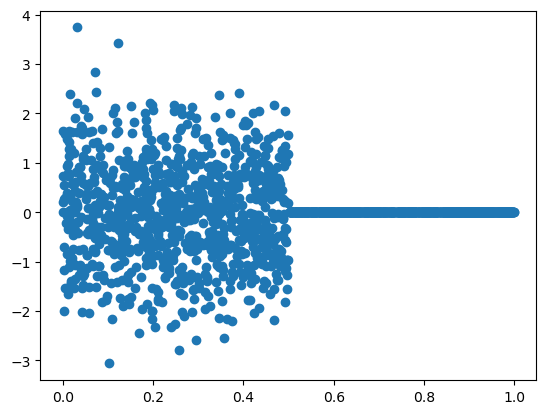

In [9]:
plt.scatter(y, xtrue) 

In [10]:
# Assuming we have the comoR functions implemented in Python
# For now, we'll create dummy data for fit_como.data_loglik
num_classes = 10

sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
# Import utils.py directly
from utils import *
from numerical_routine import *
from distribution_operation import *
from posterior_computation import *
 
scale = autoselect_scales_mix_norm(betahat=x,
                                   sebetahat=np.full(x.shape[0],1),
                                        max_class=num_classes)


Epoch [10/40], Loss: 159.0965
Epoch [20/40], Loss: 157.7357
Epoch [30/40], Loss: 157.6592
Epoch [40/40], Loss: 157.6239


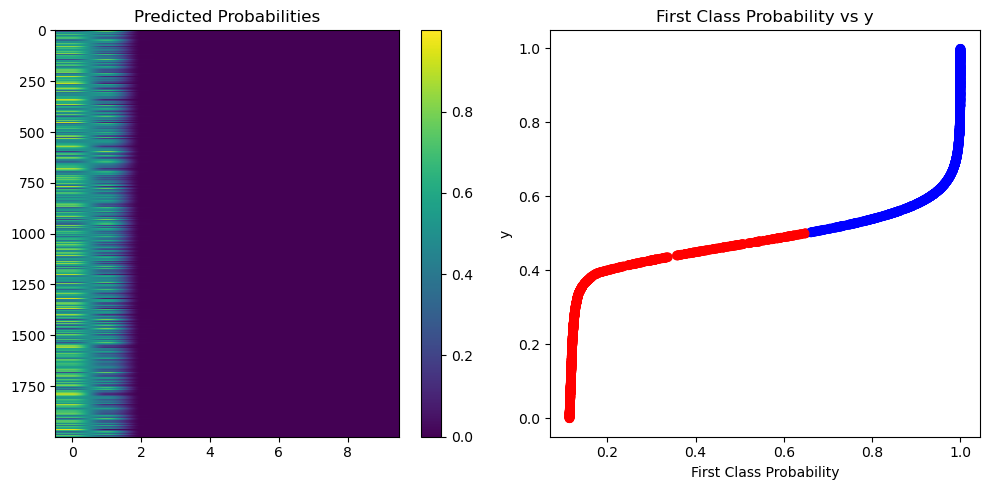

Epoch [10/100], Loss: 174.4464
Epoch [20/100], Loss: 172.6856
Epoch [30/100], Loss: 172.5642
Epoch [40/100], Loss: 172.5246
Epoch [50/100], Loss: 172.5131
Epoch [60/100], Loss: 172.4906
Epoch [70/100], Loss: 172.4760
Epoch [80/100], Loss: 172.4644
Epoch [90/100], Loss: 172.4514
Epoch [100/100], Loss: 172.4373


In [11]:


fit_como_data_loglik = get_data_loglik_normal(betahat=x,
                                              sebetahat=np.full(x.shape[0],1),
                                              location=0,
                                              scale=scale)

# Convert data to PyTorch tensors
x_train = torch.FloatTensor(y).reshape(-1, 1)
y_train = torch.FloatTensor(fit_como_data_loglik)

# Define the model
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.softmax(self.fc4(x))
        return x

# Custom loss function
def custom_loss(y_pred, y_true):
    return -torch.sum(torch.log(torch.sum(torch.exp(y_true) * y_pred, dim=1)))

# Initialize model
model = SimpleNet(1, 64, num_classes)

# Define optimizer
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 40
batch_size = 100

for epoch in range(num_epochs):
    for i in range(0, len(x_train), batch_size):
        batch_x = x_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = custom_loss(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predict
model.eval()
with torch.no_grad():
    tt1 = model(x_train).numpy()

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(tt1, aspect='auto')
plt.title('Predicted Probabilities')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(tt1[:, 0], y, c=['red' if yi < 0.5 else 'blue' for yi in y])
plt.title('First Class Probability vs y')
plt.xlabel('First Class Probability')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# Training on subset (equivalent to model2 in R code)
x_train2 = x_train[2:]
y_train2 = y_train[2:]

model2 = SimpleNet(1, 64, num_classes)
optimizer2 = optim.Adam(model2.parameters())

num_epochs2 = 100
batch_size2 = 111

for epoch in range(num_epochs2):
    for i in range(0, len(x_train2), batch_size2):
        batch_x = x_train2[i:i+batch_size2]
        batch_y = y_train2[i:i+batch_size2]
        
        optimizer2.zero_grad()
        outputs = model2(batch_x)
        loss = custom_loss(outputs, batch_y)
        loss.backward()
        optimizer2.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs2}], Loss: {loss.item():.4f}')

# Predict using model2
model2.eval()
with torch.no_grad():
    tt1_model2 = model2(x_train2).numpy()

# You can add additional plotting for model2 results if needed